### WGU D209 Predictive Modeling
# Task 2 - Predictive Analysis

#### Ednalyn C. De Dios
#### August 11, 2023

# Part I - Research Question

## A1. Propose one relevant question and choose a classification method.

> ### _Which customers are most likely to churn?_

We will endeavor to answer the above question by using Random Forest.

## A2. Define one goal of the data analysis.

The ultimate goal is to reduce operating costs. We will build a Random Forest model to predict which customers are likely to churn. The organization will benefit from knowing which customers are most likely to churn or discontinue service. This will inform the decisions of stakeholders in matters where customer retention is involved. For example, it takes a lot more money to acquire new customers than to retain existing ones. Knowing which customers are at a high risk of churn will provide the organization with advanced warnings to prevent churn. This will surely reduce the operating costs of the organization.

This goal is within the scope of the scenario and is represented in the available data.

# Part II - Method Justification

## B1. Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.

I chose the Random Forest method for classification because it's like a decision tree on steroids. It uses many decision trees and tally's the vote to decided on a class. "By combining the outputs of these trees, the random forest algorithm delivers a consolidated and more accurate result." (Sruthi, 2023). 

I expect the model to show the relationship between the target variable "churn" its best predictors. I also expect a summary of the model's performance, such as accuracy, MSE, and AUC scores.


## B2. Summarize one assumption of the chosen classification method.

The core assumption of Random Forest is that its sampling is representative of the population. Since RF models are built on multiple decision tress, they are highly sensitive to imbalanced data. Any imbalance in the data needs to be dealt with first before trying to make a prediction.

## B3. List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

The packages/libraries I've chosen are:

- sys: for running the executable file (d209_task1.py)
- random: set random seed for reproducibility of the experiment
- pandas: for manipulating dataframes
- numpy: for performing mathematical computations
- matplotlib and seaborn: for visualizations
- Image: display image from a URL
- StandardScaler: to scale the data set
- train_test_split: to split the data into train and test sets
- SMOTE: to handle imbalanced data set
- RandomForestClassifier: random forest classifier
- roc_curve, confusion_matrix, mean_squared_error: display metrics
- GridSearchCV: to optimize the model

# Part III - Data Preparation

## C1. Describe one data preprocessing goal relevant to the classification method from part A1.

One preprocessing goal is to encode categorical variables with  values using dummy variables. Most machine learning models require the use of numerical data. For binary columns, we will change "Yes" to 1 and "No" to 0. Similarly, we will convert True to 1 and False to 0. We will utilize the get_dummies() method to accomplish this goal.

## C2. Identify the initial data set variables that you will use to analyze the classification question from part A1, and classify each variable as continuous or categorical.

Independent Variables:
- Children, Continuous, Quantitative
- Age, Continuous, Quantitative
- Income, Continuous, Quantitative
- Marital, Categorical, Qualitative
- Gender, Categorical, Qualitative
- Outage_sec_perweek, Continuous, Quantitative
- Email, Continuous, Quantitative
- Contacts, Continuous, Quantitative
- Yearly_equip_failure, Categorical, Qualitative
- Techie, Categorical, Qualitative
- Contract, Categorical, Qualitative
- Port_modem, Categorical, Qualitative
- Tablet, Categorical, Qualitative
- InternetService, Categorical, Qualitative
- Phone, Categorical, Qualitative
- Multiple, Categorical, Qualitative
- OnlineSecurity, Categorical, Qualitative
- OnlineBackup, Categorical, Qualitative
- DeviceProtection, Categorical, Qualitative
- TechSupport, Categorical, Qualitative
- StreamingTV, Categorical, Qualitative
- StreamingMovies, Categorical, Qualitative
- PaperlessBilling, Categorical, Qualitative
- PaymentMethod, Categorical, Qualitative
- Tenure, Continuous, Quantitative
- MonthlyCharge, Continuous, Quantitative
- Bandwidth_GB_Year, Continuous, Quantitative

Dependent/Target Variable:
- Churn, Categorical, Qualitative

## C3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

- Load and view the data
  > use pandas to read the csv
  > use head or tail methods
  > use info()
- Perform data cleaning
  > remove duplicates, missing values, outliers
- Remove irrelevant data for the analysis
  > use the drop method
- Pre-process data
  > encode categorical data, scale the features

In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from IPython.display import Image

# for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# to print out all the outputs of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# read the csv file
df = pd.read_csv('churn_clean.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# select rows that are duplicated based on all columns
dup = df[df.duplicated()]

# find out how many rows are duplicated
dup.shape

(0, 50)

In [4]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.00,0,0.0,0,0.0
Customer_id,0,0.00,0,0.0,0,0.0
Interaction,0,0.00,0,0.0,0,0.0
UID,0,0.00,0,0.0,0,0.0
City,0,0.00,0,0.0,0,0.0
State,0,0.00,0,0.0,0,0.0
County,0,0.00,0,0.0,0,0.0
Zip,0,0.00,0,0.0,0,0.0
Lat,0,0.00,0,0.0,0,0.0
Lng,0,0.00,0,0.0,0,0.0


In [5]:
# handle missing values
df['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [6]:
# fill missing values with None as in no service
df = df.fillna("None")

df['InternetService'].value_counts()
show_missing(df)

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.0,0,0.0,0,0.0
Customer_id,0,0.0,0,0.0,0,0.0
Interaction,0,0.0,0,0.0,0,0.0
UID,0,0.0,0,0.0,0,0.0
City,0,0.0,0,0.0,0,0.0
State,0,0.0,0,0.0,0,0.0
County,0,0.0,0,0.0,0,0.0
Zip,0,0.0,0,0.0,0,0.0
Lat,0,0.0,0,0.0,0,0.0
Lng,0,0.0,0,0.0,0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x23cd2968b50>,
 'caps': [<matplotlib.lines.Line2D at 0x23cd29850d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cd29688b0>],
 'medians': [<matplotlib.lines.Line2D at 0x23cd2985610>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cd29858b0>],
 'means': []}

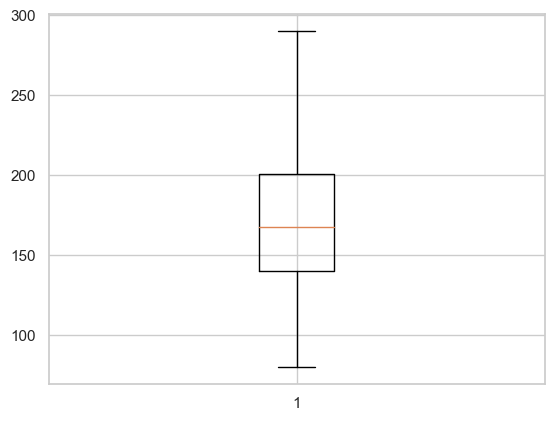

<Figure size 1000x700 with 0 Axes>

In [7]:
# remove outliers
plt.boxplot(df['MonthlyCharge'])
fig = plt.figure(figsize =(10, 7))

In [8]:
# remove irrelevant data
df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
        'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
        inplace=True)

In [9]:
# encode categorical data

# assemble list of categorical columns to generate dummy variables for
dummy_columns = ['Marital',
                 'Gender',
                 'Techie',
                 'Contract',
                 'Port_modem',
                 'Tablet',
                 'InternetService',
                 'Phone',
                 'Multiple',
                 'OnlineSecurity',
                 'OnlineBackup',
                 'DeviceProtection',
                 'TechSupport',
                 'StreamingTV',
                 'StreamingMovies',
                 'PaperlessBilling',
                 'PaymentMethod'
                ]

In [10]:
def dummify(df, column):
    """
    Takes a dataframe and column to return a dataframe with 
    dummy variables appended.
    """
    dummy = pd.get_dummies(df[column], prefix=column, prefix_sep='_',)
    return pd.concat([df, dummy], axis=1)

In [11]:
dummified = df.copy()

# loop through all the columns tp generate dummy for
for col in dummy_columns:
    dummified = dummify(dummified, col)

In [12]:
dummified.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,False,False
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False,False,False
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,True
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,True


In [13]:
# drop original columns we generated dummies for
dummified.drop(columns=dummy_columns, inplace=True)
dummified.head()

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0,68,28561.99,No,7.978323,10,0,1,6.795513,172.455519,904.536110,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,False,False
1,1,27,21704.77,Yes,11.699080,12,0,1,1.156681,242.632554,800.982766,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False,False,False
2,4,50,9609.57,No,10.752800,9,0,1,15.754144,159.947583,2054.706961,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
3,1,48,18925.23,No,14.913540,15,2,0,17.087227,119.956840,2164.579412,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,True
4,0,83,40074.19,Yes,8.147417,16,2,1,1.670972,149.948316,271.493436,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,True


In [14]:
# move target variable at the end of the dataframe
df = dummified[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Marital_Divorced', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Techie_No',
       'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No',
       'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank Transfer(automatic)',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 'Churn']]

In [15]:
# replace True with 1's and False with 0's
df = df.replace(True, 1)
df = df.replace(False, 0)

# replace 'Yes' with 1's and 'No' with 0's
df['Churn'] = df['Churn'].replace('Yes', 1)
df['Churn'] = df['Churn'].replace('No', 0)

df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1


array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>],
       [<Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>]], dtype=object)

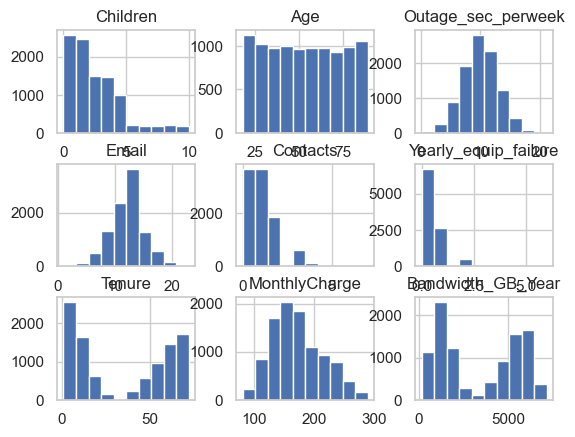

In [16]:
# make historgrams and save the plot
df[['Children',
    'Age',
    'Outage_sec_perweek',
    'Email',
    'Contacts',
    'Yearly_equip_failure',
    'Tenure',
    'MonthlyCharge',
    'Bandwidth_GB_Year'
   ]].hist()

In [17]:
# scale the data
scaler = StandardScaler()

# apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge']
df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn
0,-0.972338,0.720925,28561.99,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
1,-0.506592,-1.259957,21704.77,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1
2,0.890646,-0.148730,9609.57,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
3,-0.506592,-0.245359,18925.23,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,-0.972338,1.445638,40074.19,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1


## C4. Provide a copy of the cleaned data set.

In [18]:
# save the prepared data set
df.to_csv('churn_prepared2.csv', index=False)

# Part IV - Analysis

## D1. Split the data into training and test data sets and provide the file(s).

In [19]:
df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn
0,-0.972338,0.720925,28561.99,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
1,-0.506592,-1.259957,21704.77,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1
2,0.890646,-0.148730,9609.57,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
3,-0.506592,-0.245359,18925.23,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,-0.972338,1.445638,40074.19,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1


In [20]:
# split the dataframe between independent and dependent variables
X = df.drop('Churn',axis= 1)
y = df[['Churn']]

X.head()
y.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,-0.972338,0.720925,28561.99,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0
1,-0.506592,-1.259957,21704.77,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0
2,0.890646,-0.148730,9609.57,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
3,-0.506592,-0.245359,18925.23,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1
4,-0.972338,1.445638,40074.19,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1


,Churn
0,0
1,1
2,0
3,0
4,1


In [21]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=493, stratify=y)

In [22]:
sm = SMOTE(random_state=493)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [23]:
X_train.to_csv('X_train2.csv')
X_test.to_csv('X_test2.csv')
y_train.to_csv('y_train2.csv')
y_test.to_csv('y_test2.csv')

## D2. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

Initially, I used a very simple Random Forest classifier with default parameters. The accuracy was okay (85%) and the AUC score of 92%. This is certainly good enough but it could be better! With the help of GridSearchCV() I was able to determine the optimal number of max_depth to 14. My optimized model increased to an accuracy of 89% and an AUC score of 94%.

- Best number of max_depth is 14
- n_jobs: to use all cpu
- K-folds: 5 fold

The best number of max_depth is 14 as determined when using GridSearchCV(). The number of k-folds we used is 5, and we're using all cpu's to run the jobs.  We're also using the default parameters for everything else.

In the end, the parameter that made the most difference is the number of max_depth.

## D3. Provide the code used to perform the classification analysis from part D2.

In [24]:
# create model
clf0 = RandomForestClassifier(max_depth=2, random_state=0)

# fit the model
clf0.fit(X_train, y_train['Churn'])

# make predictions
y_pred = clf0.predict(X_test)

RandomForestClassifier(max_depth=2, random_state=0)

In [25]:
# print the accuracy score
print("====================================================")
print("Accuracy score: " + str(clf0.score(X_test, y_test)))
print("====================================================")
print("Confusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("----------------------------------------------------")
y_predicted_proba = clf0.predict_proba(X_test)[:,1]
print("AUC score: " + str(roc_auc_score(y_test, y_predicted_proba)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))

Accuracy score: 0.853
Confusion matrix: 
[[1297  173]
 [ 121  409]]
----------------------------------------------------
AUC score: 0.9230490309331278
MSE: 0.147


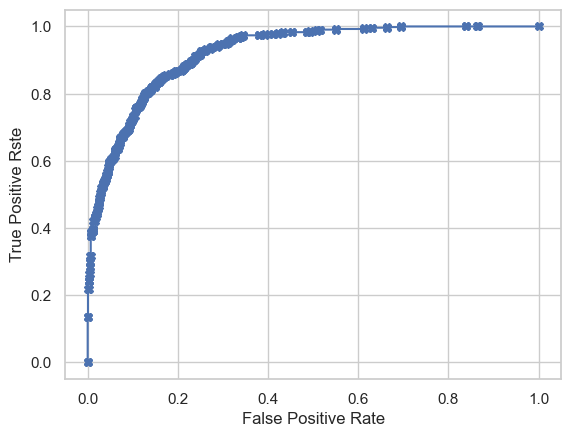

In [26]:
def viz_roc(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:,1])
    plt.plot(fpr, tpr, marker="X")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rste")
    plt.show()

viz_roc(clf0, X_test, y_test)

In [27]:
clf0.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [28]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': np.arange(2,20),
}

In [29]:
clf1 = RandomForestClassifier(random_state=493)

In [30]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf1, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [31]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train['Churn'])
grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=493),
             n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             verbose=2)

{'max_depth': 14}

In [32]:
print("Best params: " + str(grid_search.best_params_))

Best params: {'max_depth': 14}


In [33]:
# make predictions
y_pred = grid_search.predict(X_test)

In [34]:
# print the accuracy score
print("====================================================")
print("Accuracy score: " + str(grid_search.score(X_test, y_test)))
print("====================================================")
print("Confusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("----------------------------------------------------")
y_predicted_proba = grid_search.predict_proba(X_test)[:,1]
print("AUC score: " + str(roc_auc_score(y_test, y_predicted_proba)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))

Accuracy score: 0.887
Confusion matrix: 
[[1383   87]
 [ 139  391]]
----------------------------------------------------
AUC score: 0.9416602490052625
MSE: 0.113


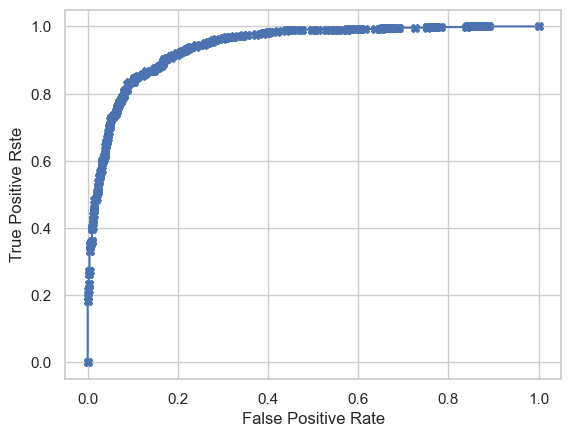

In [35]:
viz_roc(grid_search, X_test, y_test)

## E1. Explain the accuracy and the area-under-the-curve (AUC) of your classification model.

As mentioned, the accuracy, AUC, and MSE scores of the initial model are 0.85, 0.92, and 0.14, respectively, while the optimized model has an accuracy of 0.89, AUC score of 0.94, and MSE of 0.11. This means that the initial was able to predict correctly 85%% of the time, while the optimized model was able to predict correctly 94% of the time. Conversely, we're better off looking at AUC because "it calibrates the trade-off between sensitivity and specificity at the best-chosen threshold" (Chugh, 2022).

## E2. Discuss the results and implications of your classification analysis.

An untrained, no-skill predictor has an AUC of 0.5. As the ROC plot shows, the curve nearly hugs the upper left corner of the graph which depicts the AUC score of 94%, which basically means 6 points less than perfect! This has great implications because this means that the organization can predict which customers will churn and be correct approximately 94% of the time. Practically, our model can power an advanced warning system for churn candidates. The marketing department can use this warning system to inform who to target for mitigation purposes, increasing the retention rate for the organization.

In [36]:
Image(url='https://www.kdnuggets.com/wp-content/uploads/chugh_metric_accuracy_auc_2.png')

## E3. Discuss one limitation of your data analysis.

One limitation of our analysis lies in the data set used. Random forest is highly sensitive to imbalanced data sets and hence will need to be resampled. In this case, we used SMOTE to resample the data set.

## E4. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

Based on the optimized RF model's favorable result, I recommend that the organization begin the effort to productionize this model and deploy it at scale.

## F. Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

URL: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=355e3231-33b6-47fb-a34e-b05b0167d4a7

## G. Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

- https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- De Dios, EC. 2023. D209 Task 1 Performance Assessment.

## H. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

- https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
- - De Dios, EC. 2023. D209 Task 1 Performance Assessment.

In [37]:
print("Successful run!")

Successful run!
